# Repte 1: Fashion

## Enunciat
Descarrega el dataset **fashion_mnist** de la secció de datasets de la llibreria TensorFlow i crea una xarxa neuronal capaç d'identificar les diferents peces de roba. Els valors de les etiquetes de sortida corresponen a les següents classes:

>0: T-shirt/top<br>
>1: Trouser<br>
>2: Pullover<br>
>3: Dress<br>
>4: Coat<br>
>5: Sandal<br>
>6: Shirt<br>
>7: Sneaker<br>
>8: Bag<br>
>9: Ankle boot<br>



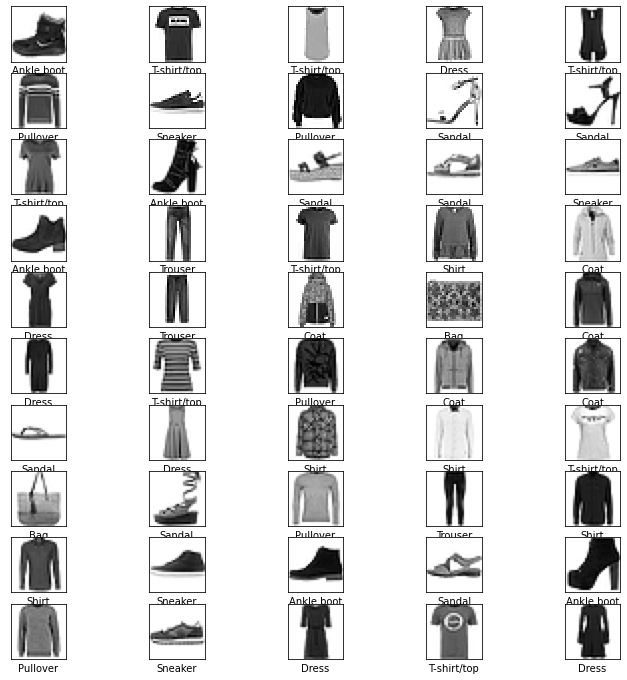

In [56]:
# Importem llibreries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

# Descarreguem el dataset
fashion_mnist_ds = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist_ds.load_data()

In [57]:
# Creem una llista amb els noms de les peces de roba
etiquetes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle' 'boot']
# Normalitzem dataset
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = x_train / 255
x_test = x_test / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Comprovem la forma de les dades
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


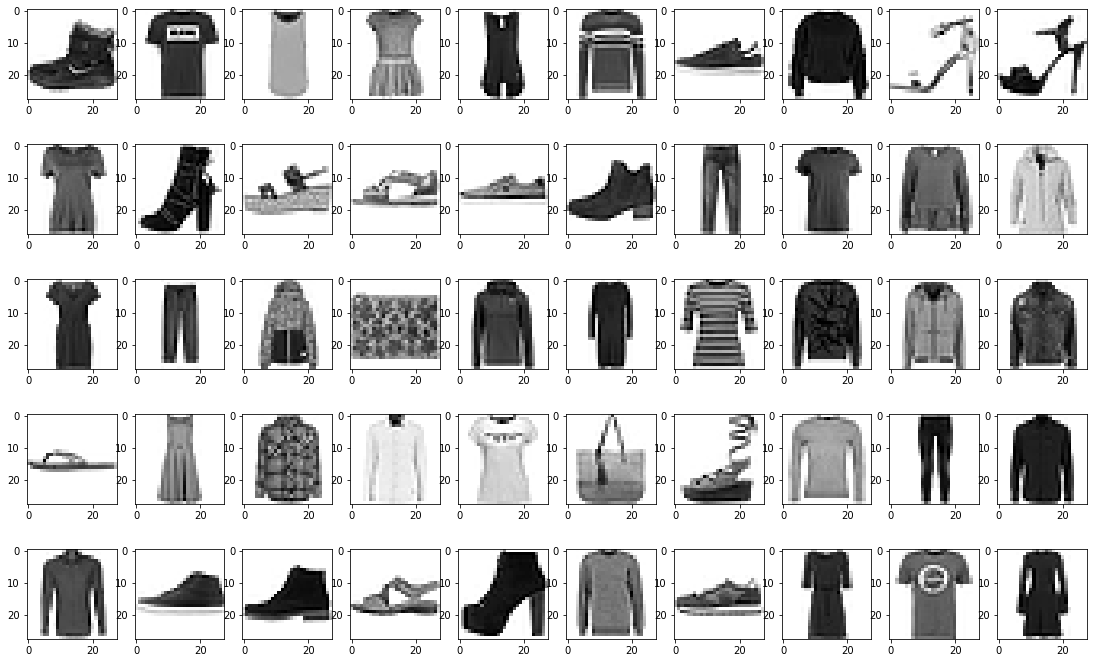

In [58]:
# Visualitzem les primeres 50 imatges
fig = plt.figure(figsize=(19,12))
columns = 10
rows = 5
for i in range(1, columns*rows+1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(x_train[i-1], cmap=plt.cm.binary)
plt.show()

In [59]:
# Definim el model de xarxa neuronal
# Si fem servir la capa keras.layers.Flatten() ens podem estalviar fer reshape
# de les dades d'entrada
# Mostrem el resum del model creat
# Definim el tipus de xarxa neuronal
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=100)

model.summary()

Epoch 1/5
600/600 [==============================] - 2s 2ms/step - loss: 2.0334 - accuracy: 0.3279
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 1.7303 - accuracy: 0.5656
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 1.5365 - accuracy: 0.6416
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 1.3716 - accuracy: 0.6762
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 1.2326 - accuracy: 0.6962
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                     

In [60]:
# Evaluem el model amb el conjunt de dades de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test:loss: ', test_loss)
print('test_acc :', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 1.1814 - accuracy: 0.6964
test:loss:  1.1814343929290771
test_acc : 0.696399986743927


1/1 [==============================] - 0s 49ms/step
[[0.09735388 0.42916432 0.0947866  0.20942569 0.04479906 0.02361397
  0.04649397 0.01003705 0.01889524 0.02543017]]
Predicció:  Trouser
Resposta:  Trouser


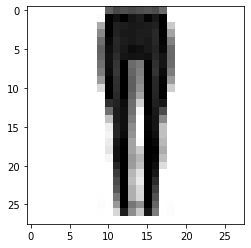

In [61]:
# Mostra la predicció que realitza la Xarxa neuronal de la imatge de test 777,
# la resposta correcta i la imatge corresponent

prediccio = model.predict(np.array([x_test[777]]))
print(prediccio)
print('Predicció: ', etiquetes[np.argmax(prediccio)])
print('Resposta: ', etiquetes[np.argmax(y_test[777])])

plt.imshow(x_test[777].reshape(28,28), cmap=plt.cm.binary)


## Part opcional 1

In [67]:
# Canvia l'optimitzador del model per tal d'obtenir una xarxa neuronal que
# millori l'encert del model anterior
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=100)

model.summary()

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4109 - accuracy: 0.8565
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4039 - accuracy: 0.8587
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3984 - accuracy: 0.8607
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3939 - accuracy: 0.8625
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3902 - accuracy: 0.8634
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                     

## Part opcional 2

1/1 [==============================] - 0s 20ms/step


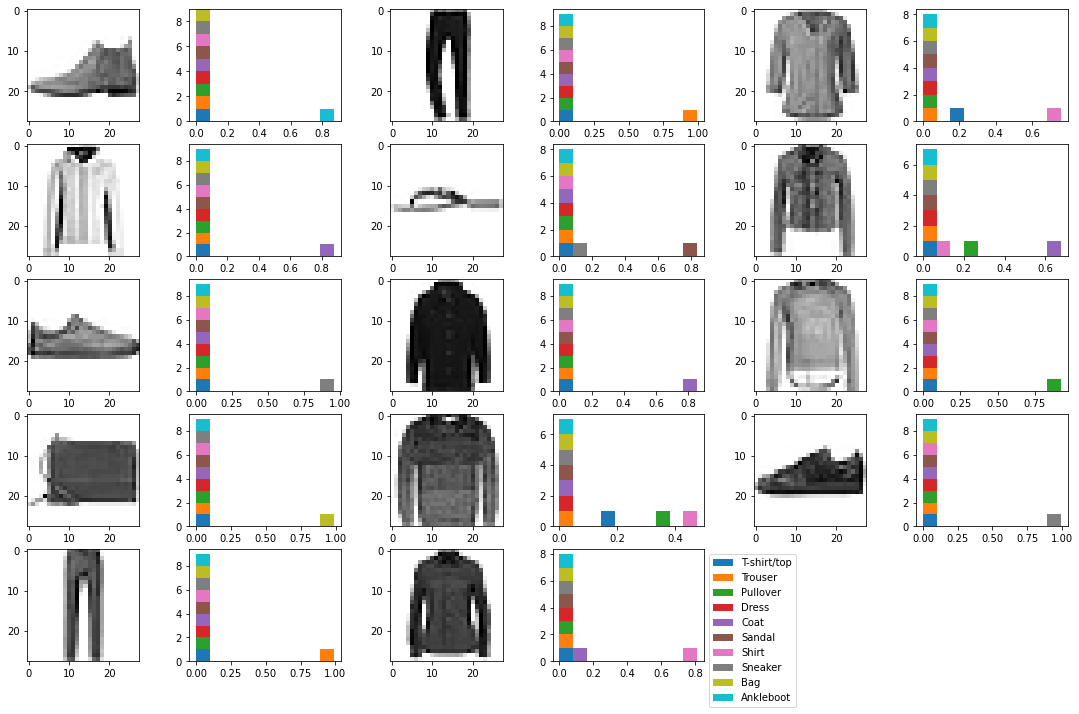

In [82]:
# Mostra les 14 primeres imatges de test, cada una amb un histograma al costat
# on es visualitzi la probabilitat de pertànyer a cada una de les classes
fig = plt.figure(figsize=(19,12))
for i in range(0,28,2):
  fig.add_subplot(5, 6, i+1)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  fig.add_subplot(5, 6, i+2)
  prediccio = model.predict(np.array([x_test[i]]))
  plt.hist(prediccio, histtype='barstacked', label=etiquetes)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()